# Data Classification

## Importing Libraries

In [1]:
!pip install gensim

  Using cached smart_open-7.3.0.post1-py3-none-any.whl.metadata (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 12.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 12.9 MB/s eta 0:00:0000:0100:01
Using cached smart_open-7.3.0.post1-py3-none-any.whl (61 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [gensim]2m4/5 [gensim]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import nltk, gensim, os, pandas as pd, string, json, re, sys, numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from pathlib import Path
from pprint import pprint

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/prakhartrivedi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/prakhartrivedi/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/prakhartrivedi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/prakhartrivedi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/prakhartrivedi/nltk_data...
[nltk_data]    |   Package averaged_perceptron

True

## Loading and Extracting Data

In [3]:
data_folder = Path('data')
if not data_folder.exists():
    raise FileNotFoundError(f"Data folder '{data_folder}' does not exist. Please check the path.")

In [4]:
corpus = []
filenames = []
for filename in data_folder.iterdir():
    fp = open(str(filename), 'r', encoding='utf-8')
    corpus.append(fp.read())
    filenames.append(filename.name)
    fp.close()

print(corpus.__len__())
print("Filenames:", filenames)

73
Filenames: ['video-0ZF35dPoBeE.txt', 'redditPost26.txt', 'redditPost27.txt', 'redditPost33.txt', 'NPRArticle.txt', 'redditPost25.txt', 'redditPost31.txt', 'redditPost19.txt', 'redditPost30.txt', 'redditPost24.txt', 'redditPost20.txt', 'redditPost34.txt', 'redditPost35.txt', 'redditPost21.txt', 'redditPost37.txt', 'redditPost23.txt', 'redditPost22.txt', 'redditPost36.txt', 'redditPost51.txt', 'redditPost45.txt', 'redditPost44.txt', 'redditPost50.txt', 'redditPost46.txt', 'redditPost52.txt', 'redditPost53.txt', 'redditPost47.txt', 'redditPost9.txt', 'video-ok-aNnc0Dko.txt', 'Mixmag.txt', 'redditPost43.txt', 'redditPost57.txt', 'redditPost56.txt', 'redditPost42.txt', 'redditPost8.txt', 'redditPost68.txt', 'redditPost40.txt', 'redditPost41.txt', 'redditPost55.txt', 'redditPost69.txt', 'redditPost6.txt', 'redditPost64.txt', 'redditPost58.txt', 'GuardianArticle.txt', 'TechRadar.txt', 'redditPost59.txt', 'redditPost65.txt', 'redditPost7.txt', 'redditPost5.txt', 'redditPost66.txt', 'video-g

## Data Preprocessing

In [6]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [ ]:
def clean(doc: str):
    punc_free = ''.join([ch for ch in doc.lower() if ch not in exclude])
    stop_free = ' '.join([i for i in punc_free.split() if i not in stop])
    normalised = ' '.join(lemma.lemmatize(word) for word in stop_free.split())
    # stemmed = ' '.join([stemmer.stem(word) for word in normalised.split()])
    return normalised

In [8]:
doc_clean = [clean(doc).split() for doc in corpus]

print(len(doc_clean))

73


In [9]:
doc_clean

[['video',
  'id',
  '0zf35dpobee',
  'ive',
  'premium',
  'like',
  '7',
  'year',
  'live',
  'u',
  'still',
  'dont',
  'frustrating',
  'using',
  'spotifys',
  'ai',
  'dj',
  'past',
  'day',
  'really',
  'like',
  'different',
  'current',
  'radio',
  'algorithm',
  'dj',
  'avatar',
  'narrates',
  'mini',
  'set',
  'list',
  '45',
  'track',
  'usertailored',
  'theme',
  'simple',
  'couldnt',
  'figure',
  'own😂',
  'thank',
  'making',
  'easy',
  'video',
  'follow',
  'also',
  'appreciate',
  'leave',
  'slip',
  'word',
  'video',
  'make',
  'feel',
  'like',
  'im',
  'learning',
  'another',
  'person',
  'instead',
  'googling',
  'information',
  'available',
  'premium',
  'user',
  'usa',
  'canada',
  'beta',
  'testing',
  '143',
  'bro',
  'didnt',
  'skip',
  'ivy',
  'youre',
  'w',
  '🙏',
  'regardless',
  'updating',
  'app',
  'premium',
  'user',
  'dont',
  'option',
  'interesting',
  'question',
  'get',
  'beta',
  'function',
  'different',
  '

In [14]:
doc_clean = [list(filter(lambda x: len(x) < 15, doc)) for doc in doc_clean]

Total number of words: 42285
Average word length: 5.353553269480903
Standard deviation of word lengths: 2.1547244325407964
Minimum word length: 1
Maximum word length: 14
Median word length: 5.0
Word length variance: 4.642837380188258
Word length quantiles: [4. 5. 7.]
Word length skewness: 0.7872377559411659


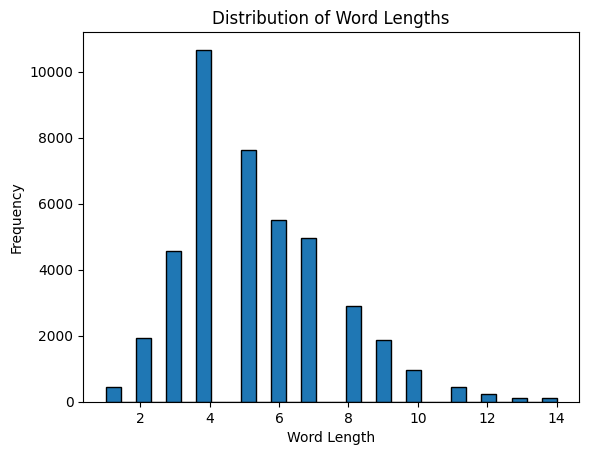

In [16]:
lengths = []
for doc in doc_clean:
    for word in doc:
        lengths.append(len(word))
print("Total number of words:", len(lengths))
print("Average word length:", np.mean(lengths))
print("Standard deviation of word lengths:", np.std(lengths))
print("Minimum word length:", np.min(lengths))
print("Maximum word length:", np.max(lengths))
print("Median word length:", np.median(lengths))
print("Word length variance:", np.var(lengths))
print("Word length quantiles:", np.quantile(lengths, [0.25, 0.5, 0.75]))
print("Word length skewness:", pd.Series(lengths).skew())

# Distribution of word lengths
import matplotlib.pyplot as plt
plt.hist(lengths, bins=30, edgecolor='black')
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

In [17]:
dictionary = gensim.corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

print("Dictionary created with", len(dictionary), "unique tokens.")

Dictionary created with 5937 unique tokens.


## Topic Modelling with LDA

In [18]:
topic_num = 5
word_num = 5

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=topic_num, id2word=dictionary, passes=20)

pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))

[(0, '0.023*"song" + 0.019*"like" + 0.019*"dj" + 0.013*"ai" + 0.011*"music"'),
 (1,
  '0.024*"music" + 0.020*"spotify" + 0.015*"apple" + 0.013*"playlist" + '
  '0.008*"like"'),
 (2,
  '0.029*"song" + 0.022*"like" + 0.021*"playlist" + 0.019*"music" + '
  '0.015*"artist"'),
 (3, '0.020*"song" + 0.017*"dj" + 0.017*"like" + 0.012*"ai" + 0.010*"spotify"'),
 (4,
  '0.027*"playlist" + 0.025*"song" + 0.018*"like" + 0.015*"music" + '
  '0.013*"new"')]


In [20]:
print("Perplexity:", ldamodel.log_perplexity(doc_term_matrix))

Perplexity: -7.3043218448876175


In [ ]:
print("File name and its corresponding topic ID with probability:")
dic_topic_doc = {}
for index, doc in enumerate(doc_term_matrix):
    topics = ldamodel.get_document_topics(doc)
    for topic_id, prob in topics:
        if filenames[index] not in dic_topic_doc:
            dic_topic_doc[filenames[index]] = []
        dic_topic_doc[filenames[index]].append((topic_id, prob))
        print(f"File: {filenames[index]}, Topic ID: {topic_id}, Probability: {prob:.4f}")


File name and its corresponding topic ID with probability:
File: video-0ZF35dPoBeE.txt, Topic ID: 0, Probability: 0.9989
File: redditPost26.txt, Topic ID: 0, Probability: 0.0108
File: redditPost26.txt, Topic ID: 1, Probability: 0.0107
File: redditPost26.txt, Topic ID: 2, Probability: 0.0107
File: redditPost26.txt, Topic ID: 3, Probability: 0.9572
File: redditPost26.txt, Topic ID: 4, Probability: 0.0106
File: redditPost27.txt, Topic ID: 0, Probability: 0.1029
File: redditPost27.txt, Topic ID: 3, Probability: 0.8751
File: redditPost33.txt, Topic ID: 0, Probability: 0.8416
File: redditPost33.txt, Topic ID: 1, Probability: 0.1469
File: NPRArticle.txt, Topic ID: 0, Probability: 0.9977
File: redditPost25.txt, Topic ID: 0, Probability: 0.7706
File: redditPost25.txt, Topic ID: 1, Probability: 0.2218
File: redditPost31.txt, Topic ID: 0, Probability: 0.9893
File: redditPost19.txt, Topic ID: 0, Probability: 0.9968
File: redditPost30.txt, Topic ID: 0, Probability: 0.9730
File: redditPost24.txt, To

In [ ]:
# Save the model
# ldamodel.save('lda_model.gensim')